In [1]:
import numpy as np
import numba
import matplotlib.pyplot as plt
njit = numba.njit 

## INFINITE SQUARE WELL POTENTIAL:

Let us consider a particle subject to an infinite square well potential. There are two main ways of describing this situation. We will do it the following way: The particle's state is restricted to the domain $\mathcal{L^2}([0, L])$ and with Neumann and Dirichlet boundary conditions $\varphi(x=0) = \varphi(x=L)=0$, $\partial_x\varphi(x=0) = \partial_x\varphi(x=L)=0$. For the region $x \in [0, L]$, the particle is subject to a potential $V(x) = 0$. Then, the Schrödinger Equation for the stationary states $\varphi(x)$ reads as:
$$
\frac{d^2\varphi}{dx^2} = -\frac{2mE}{\hbar^2}\varphi \implies \frac{d^2\varphi}{dx^2}+k^2\varphi = 0
$$

The independent solutions to this equation are $\cos(kx)$, and $\sin(kx)$. Applying the boundary conditions, we obtain the eigenvalues $k = \frac{\pi}{L}n \ , \ n \in \mathbb{N}$ and the complete basis $\left\{\sqrt{\frac{2}{L}}\sin \left(\frac{\pi n}{L}x\right)\right\}_{n\in\mathbb{N}}$

We expand the time dependent solution as a Sine Fourier Series:
\begin{equation}
\phi (x, t ) = \sqrt{\frac{2}{L}}\sum_{n = 0}^{\infty} v_n(t)\sin \left(\frac{\pi n}{L}x\right)
\end{equation}

Plugging $(1)$ in time independent Schrödinger Equation, we obtain an ODE for $v(t)$: $\frac{dv}{dt} = -i\frac{E_n}{\hbar}v \ , \ E_n = \frac{\hbar^2 k_n^2}{2m}$. Consider the particle with initial state $\psi(x,0) = \sum_n g_n(x)$ (let us assume it can also be expanded as a Fourier Series). Then, we obtain the initial condition $v_n(t) = c_n \sqrt{\frac{2}{L}}\sin \left(\frac{\pi n}{L}s\right)$. Then, we finally have 

$$
\psi(x,t) = \sqrt{\frac{2}{L}}\sum_{n = 0}^{\infty} c_n\sin \left(\frac{\pi n}{L}x\right)e^{-\frac{i}{\hbar}E_nt}
$$


### Example: lowest energy modes activated

Let the initial state composed by the N lowest energy oscillation modes: 
$$
\psi(x,0) = \sqrt{\frac{2}{N L}} \sum_{n=1}^N \sin \left(\frac{n \pi}{L}x\right)
$$

 Then, its Fourier coefficients are: $c_n = \sqrt{\frac{1}{N}} \ , \ n = 1,...,N \ ; \ c_n = 0 \ , \ n > N$

$$ 
\psi(x,t) = \sqrt{\frac{2}{N L}} \sum_{n=1}^N \sin \left(\frac{n \pi}{L}x\right)e^{-i\frac{\hbar (\pi n)^2}{2mL^2}t}
$$

For ilustrational purposes, we will show the real part of the wavefunction:

$$ 
\psi_{Re}(x,t) = \sqrt{\frac{2}{N L}} \sum_{n=1}^N \sin \left(\frac{n \pi}{L}x\right)\cos\left(\frac{\hbar (\pi n)^2}{2mL^2}t\right)
$$

In [2]:
@njit
def infinitesq(x, t, N, L=1, m=1):
    psi = np.zeros(len(x))
    for n in range(1, N+1):
        for i in range(len(x)):
            psi[i] += np.sqrt(2/N*L)*np.sin(np.pi*n*x[i]/L)*np.cos((n*np.pi)**2*t)
    return psi

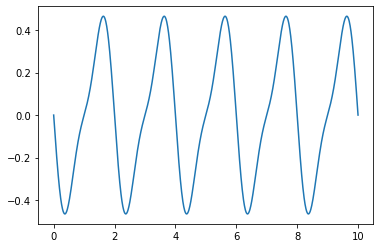

In [3]:
x = np.linspace(0, 10, 1000)
t = np.linspace(0, 10, 100)
N = 2

psi = lambda t: infinitesq(x, t, N)
plt.plot(x, psi(t[2]))